In [44]:
# to visualize the computational graph
!pip install torchviz
from torchviz import make_dot

In [45]:
# Import the torch module
import torch

# Tensor Operations
There are the vast majority of operations on and between tensors available in the torch module

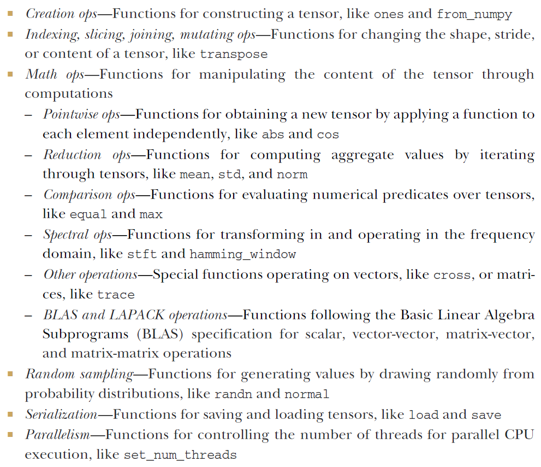

## Add operators

In [52]:
a = torch.rand(4,3)
b = torch.randn_like(a)
print('a -->', a)
print('b -->', b)
print()

# version 1 of add method
print('a+b -->',a+b)
print()

# version 2 of add method
c = torch.add(a,b)
print('torch.add(a,b) -->', c)
print()

# version 3 of add method
d = b.add(a)
print('b.add(a) -->',d)
print('a -->', a)
print('b -->', b)
print()

# version 4 of add method, but in-plance
e = b.add_(a)
print('b.add_(a) -->',e)
print('a -->', a)
print('b -->', b)

a --> tensor([[0.0934, 0.0221, 0.9863],
        [0.5882, 0.5499, 0.3858],
        [0.4000, 0.7123, 0.1420],
        [0.2881, 0.4530, 0.8377]])
b --> tensor([[-0.7761, -1.3495,  0.3053],
        [ 0.1746, -0.2846,  0.8803],
        [-0.4479,  0.2404, -0.4148],
        [-0.7339,  0.7217, -1.9746]])

a+b --> tensor([[-0.6827, -1.3274,  1.2915],
        [ 0.7627,  0.2653,  1.2662],
        [-0.0480,  0.9527, -0.2727],
        [-0.4458,  1.1747, -1.1369]])

torch.add(a,b) --> tensor([[-0.6827, -1.3274,  1.2915],
        [ 0.7627,  0.2653,  1.2662],
        [-0.0480,  0.9527, -0.2727],
        [-0.4458,  1.1747, -1.1369]])

b.add(a) --> tensor([[-0.6827, -1.3274,  1.2915],
        [ 0.7627,  0.2653,  1.2662],
        [-0.0480,  0.9527, -0.2727],
        [-0.4458,  1.1747, -1.1369]])
a --> tensor([[0.0934, 0.0221, 0.9863],
        [0.5882, 0.5499, 0.3858],
        [0.4000, 0.7123, 0.1420],
        [0.2881, 0.4530, 0.8377]])
b --> tensor([[-0.7761, -1.3495,  0.3053],
        [ 0.1746, -0.2846,

a --> tensor([[0.4194, 0.7169, 0.1888],
        [0.5688, 0.8051, 0.5058],
        [0.9547, 0.9873, 0.7549],
        [0.7899, 0.0331, 0.6700]], requires_grad=True)
b --> tensor([[ 0.9244, -1.2651, -0.1474],
        [-0.1725, -0.9626, -0.3295],
        [-0.7482, -0.8438, -1.1055],
        [ 0.3147,  1.7063,  0.7236]], requires_grad=True)

a+b --> tensor([[ 1.3438, -0.5483,  0.0414],
        [ 0.3962, -0.1575,  0.1763],
        [ 0.2065,  0.1435, -0.3506],
        [ 1.1046,  1.7395,  1.3936]], grad_fn=<AddBackward0>)

torch.add(a,b) --> tensor([[ 1.3438, -0.5483,  0.0414],
        [ 0.3962, -0.1575,  0.1763],
        [ 0.2065,  0.1435, -0.3506],
        [ 1.1046,  1.7395,  1.3936]], grad_fn=<AddBackward0>)



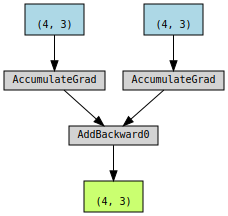

In [49]:
a = torch.rand(4,3, requires_grad=True)
b = torch.randn_like(a, requires_grad=True)
print('a -->', a)
print('b -->', b)
print()

# version 1 of add method
print('a+b -->',a+b)
print()

# version 2 of add method
c = torch.add(a,b)
print('torch.add(a,b) -->', c)
print()

make_dot(c)

## torch.item(): get value of a tensor of size 1

In [ ]:
a = torch.randn(4,3)
print('a -->', a)
print('type(a) -->', type(a))
print()

b = a.sum()
print('b -->', b)
print('type(b) -->', type(b))
print()

# .item() returns the value of this tensor as a standard Python number. This only works for tensors with one element.
c = b.item()
print('c -->', c)
print('type(c) -->', type(c))
print()

# .tolist() returns the tensor with multiple elements as a Python (nested) list.
d = a.tolist()
print('d -->', d)
print('type(d) -->', type(d))

a --> tensor([[-0.9879,  1.8122,  0.1189],
        [ 0.7907, -0.1842,  0.4326],
        [ 0.5567, -1.9422, -2.8181],
        [ 0.1965,  0.7652, -0.3145]])
type(a) --> <class 'torch.Tensor'>

b --> tensor(-1.5741)
type(b) --> <class 'torch.Tensor'>

c --> -1.5740514993667603
type(c) --> <class 'float'>

d --> [[-0.9879348874092102, 1.812186598777771, 0.11891936510801315], [0.7907031178474426, -0.18419870734214783, 0.4325805604457855], [0.5567066073417664, -1.9422171115875244, -2.8180625438690186], [0.19649328291416168, 0.7652255892753601, -0.3144536316394806]]
type(d) --> <class 'list'>


## Change the shape of a tensor: view() vs reshape()
Reference:
> - https://pytorch.org/docs/stable/generated/torch.reshape.html
> - https://jdhao.github.io/2019/07/10/pytorch_view_reshape_transpose_permute/

Both view() and reshape() can be used to change the size or shape of tensors, with some differences.
- view()
> - It will return a tensor with the new shape.
> - It can only operate on contiguous tensor and the returned tensor is still contiguous
> - The returned tensor shares the underling data with the original tensor. (If you change the tensor value in the returned tensor, the corresponding value in the viewed tensor also changes.)
- reshape()
> - It will return a tensor with the new shape.
> - But, the returned tensor may be a copy or a view of the original tensor.
>>- if input is contiguous with compatible strides, it returns a view
>>- otherwise, it returns a copy


In [ ]:
a = torch.rand(4,3)
print('a -->', a)
print('a.shape -->', a.shape)
print('check if a is contiguous-->', a.is_contiguous())
print('memory address of a -->', a.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

b = a.view(-1, 2)   # the size -1 is inferred from other dimensions
print('b -->', b)
print('b.shape -->', b.shape)
print('check if b is contiguous-->', b.is_contiguous())
print('memory address of b -->', b.untyped_storage().data_ptr())
print()

c = a.reshape(-1, 2)   # the size -1 is inferred from other dimensions
print('c -->', c)
print('c.shape -->', c.shape)
print('check if c is contiguous-->', c.is_contiguous())
print('memory address of c -->', c.untyped_storage().data_ptr())

a --> tensor([[0.3680, 0.4030, 0.9491],
        [0.5334, 0.9818, 0.9608],
        [0.1376, 0.2600, 0.1358],
        [0.1232, 0.3482, 0.4260]])
a.shape --> torch.Size([4, 3])
check if a is contiguous--> True
memory address of a --> 98159889855680

b --> tensor([[0.3680, 0.4030],
        [0.9491, 0.5334],
        [0.9818, 0.9608],
        [0.1376, 0.2600],
        [0.1358, 0.1232],
        [0.3482, 0.4260]])
b.shape --> torch.Size([6, 2])
check if b is contiguous--> True
memory address of b --> 98159889855680

c --> tensor([[0.3680, 0.4030],
        [0.9491, 0.5334],
        [0.9818, 0.9608],
        [0.1376, 0.2600],
        [0.1358, 0.1232],
        [0.3482, 0.4260]])
c.shape --> torch.Size([6, 2])
check if c is contiguous--> True
memory address of c --> 98159889855680


In [ ]:
a_notContiguous = torch.rand(4,3).transpose(0,1)
print('a_notContiguous -->', a_notContiguous)
print('a_notContiguous.shape -->', a.shape)
print('check if a_notContiguous is contiguous-->', a_notContiguous.is_contiguous())
print('memory address of a_notContiguous -->', a_notContiguous.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

c = a_notContiguous.reshape(-1, 2)   # the size -1 is inferred from other dimensions
print('c -->', c)
print('c.shape -->', c.shape)
print('check if c is contiguous-->', c.is_contiguous())
print('memory address of c -->', c.untyped_storage().data_ptr())

b = a_notContiguous.view(-1, 2)   # the size -1 is inferred from other dimensions
print('b -->', b)
print('b.shape -->', b.shape)
print('check if b is contiguous-->', b.is_contiguous())
print('memory address of b -->', b.untyped_storage().data_ptr())
print()

a_notContiguous --> tensor([[0.8400, 0.0838, 0.0676, 0.0178],
        [0.1955, 0.7719, 0.9175, 0.5264],
        [0.7430, 0.3194, 0.9656, 0.1849]])
a_notContiguous.shape --> torch.Size([4, 3])
check if a_notContiguous is contiguous--> False
memory address of a_notContiguous --> 98159807320064

c --> tensor([[0.8400, 0.0838],
        [0.0676, 0.0178],
        [0.1955, 0.7719],
        [0.9175, 0.5264],
        [0.7430, 0.3194],
        [0.9656, 0.1849]])
c.shape --> torch.Size([6, 2])
check if c is contiguous--> True
memory address of c --> 98159889888256


RuntimeError: ignored

## Change the order of the dimensions of a tensor: transpose() vs permute()

- transpose()
> - It operates both on contiguous and non-contiguous tensor
> - It is not limited to matrices. We can transpose a multidimensional array by specifying the two dimensions along which transposing (flipping shape and stride) should occur
> - It only swaps two dimensions each time

- permute()
> - It can swap all the dimensions.

Note: tranpose() can be thought as a special case of permute() method in for 2D tensors.

In [ ]:
a = torch.rand(4,3)
print('a -->', a)
print('a.shape -->', a.shape)
print('check if a is contiguous-->', a.is_contiguous())
print('memory address of a -->', a.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

b = a.transpose(0, 1)
print('b -->', b)
print('b.shape -->', b.shape)
print('check if b is contiguous-->', b.is_contiguous())
print('memory address of b -->', b.untyped_storage().data_ptr())
print()

c = a.permute(1, 0)
print('c -->', c)
print('c.shape -->', c.shape)
print('check if c is contiguous-->', c.is_contiguous())
print('memory address of c -->', c.untyped_storage().data_ptr())

a --> tensor([[0.1308, 0.8997, 0.5208],
        [0.0507, 0.9531, 0.4936],
        [0.7574, 0.2351, 0.5476],
        [0.7346, 0.1158, 0.2522]])
a.shape --> torch.Size([4, 3])
check if a is contiguous--> True
memory address of a --> 98159889875008

b --> tensor([[0.1308, 0.0507, 0.7574, 0.7346],
        [0.8997, 0.9531, 0.2351, 0.1158],
        [0.5208, 0.4936, 0.5476, 0.2522]])
b.shape --> torch.Size([3, 4])
check if b is contiguous--> False
memory address of b --> 98159889875008

c --> tensor([[0.1308, 0.0507, 0.7574, 0.7346],
        [0.8997, 0.9531, 0.2351, 0.1158],
        [0.5208, 0.4936, 0.5476, 0.2522]])
c.shape --> torch.Size([3, 4])
check if c is contiguous--> False
memory address of c --> 98159889875008


In [ ]:
a_notContiguous = torch.rand(4,3).transpose(0,1)
print('a_notContiguous -->', a_notContiguous)
print('a_notContiguous.shape -->', a.shape)
print('check if a_notContiguous is contiguous-->', a_notContiguous.is_contiguous())
print('memory address of a_notContiguous -->', a_notContiguous.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

b = a_notContiguous.transpose(0, 1)
print('b -->', b)
print('b.shape -->', b.shape)
print('check if b is contiguous-->', b.is_contiguous())
print('memory address of b -->', b.untyped_storage().data_ptr())
print()

c = a_notContiguous.permute(1, 0)   # the size -1 is inferred from other dimensions
print('c -->', c)
print('c.shape -->', c.shape)
print('check if c is contiguous-->', c.is_contiguous())
print('memory address of c -->', c.untyped_storage().data_ptr())

a_notContiguous --> tensor([[0.7788, 0.1356, 0.3695, 0.3677],
        [0.5823, 0.2180, 0.8858, 0.9171],
        [0.3896, 0.3523, 0.5150, 0.6345]])
a_notContiguous.shape --> torch.Size([4, 3])
check if a_notContiguous is contiguous--> False
memory address of a_notContiguous --> 98159807322816

b --> tensor([[0.7788, 0.5823, 0.3896],
        [0.1356, 0.2180, 0.3523],
        [0.3695, 0.8858, 0.5150],
        [0.3677, 0.9171, 0.6345]])
b.shape --> torch.Size([4, 3])
check if b is contiguous--> True
memory address of b --> 98159807322816

c --> tensor([[0.7788, 0.5823, 0.3896],
        [0.1356, 0.2180, 0.3523],
        [0.3695, 0.8858, 0.5150],
        [0.3677, 0.9171, 0.6345]])
c.shape --> torch.Size([4, 3])
check if c is contiguous--> True
memory address of c --> 98159807322816


In [ ]:
a = torch.rand(4,3,5)
print('a -->', a)
print('a.shape -->', a.shape)
print('check if a is contiguous-->', a.is_contiguous())
print('memory address of a -->', a.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

b = a.transpose(0, 2)
print('b -->', b)
print('b.shape -->', b.shape)
print('check if b is contiguous-->', b.is_contiguous())
print('memory address of b -->', b.untyped_storage().data_ptr())
print()

c = a.permute(1, 0, 2)   # the size -1 is inferred from other dimensions
print('c -->', c)
print('c.shape -->', c.shape)
print('check if c is contiguous-->', c.is_contiguous())
print('memory address of c -->', c.untyped_storage().data_ptr())

a --> tensor([[[0.9324, 0.1663, 0.7783, 0.8029, 0.4058],
         [0.9098, 0.5545, 0.2470, 0.1172, 0.6747],
         [0.9949, 0.1249, 0.7266, 0.4818, 0.7660]],

        [[0.3220, 0.4457, 0.3672, 0.7240, 0.1196],
         [0.3308, 0.8543, 0.9193, 0.6795, 0.8237],
         [0.0385, 0.0649, 0.6904, 0.4732, 0.8840]],

        [[0.5359, 0.0624, 0.6611, 0.3567, 0.8278],
         [0.2612, 0.8946, 0.1792, 0.6821, 0.1000],
         [0.8910, 0.9328, 0.0283, 0.1513, 0.0549]],

        [[0.6184, 0.4461, 0.9076, 0.4319, 0.8981],
         [0.0682, 0.6880, 0.1973, 0.8096, 0.8446],
         [0.3151, 0.7617, 0.7952, 0.9876, 0.3593]]])
a.shape --> torch.Size([4, 3, 5])
check if a is contiguous--> True
memory address of a --> 98159889948800

b --> tensor([[[0.9324, 0.3220, 0.5359, 0.6184],
         [0.9098, 0.3308, 0.2612, 0.0682],
         [0.9949, 0.0385, 0.8910, 0.3151]],

        [[0.1663, 0.4457, 0.0624, 0.4461],
         [0.5545, 0.8543, 0.8946, 0.6880],
         [0.1249, 0.0649, 0.9328, 0.7617]],


## Adding dimension: Expanding a Tensor with a Dummy Axis

Method (1): Using **None** indexing

Methhod (2): Using **"torch.unsqueeze()"** method

In [ ]:
a = torch.randn(4)
print('a -->', a)
print('a.shape -->', a.shape)
print('a.storage_offset()-->', a.storage_offset())
print('a.stride()-->', a.stride())
print('memory address of a-->', a.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

b = a[None,:]
print('b -->', b)
print('b.shape -->', b.shape)
print('b.storage_offset()-->', b.storage_offset())
print('b.stride()-->', b.stride())
print('memory address of b -->', b.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

c = a[:,None]
print('c -->', c)
print('c.shape -->', c.shape)
print('c.storage_offset()-->', c.storage_offset())
print('c.stride()-->', c.stride())
print('memory address of c -->', c.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

d = a[None]
print('d -->', d)
print('d.shape -->', d.shape)
print('d.storage_offset()-->', d.storage_offset())
print('d.stride()-->', d.stride())
print('memory address of d -->', d.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

e = a[None,None,:]
print('e -->', e)
print('e.shape -->', e.shape)
print('e.storage_offset()-->', e.storage_offset())
print('e.stride()-->', e.stride())
print('memory address of e -->', e.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

f = a[None,:,None]
print('f -->', f)
print('f.shape -->', f.shape)
print('f.storage_offset()-->', f.storage_offset())
print('f.stride()-->', f.stride())
print('memory address of f -->', f.untyped_storage().data_ptr())  # check address of the tensor in memory

a --> tensor([-0.6256,  1.9530,  0.4510, -1.3761])
a.shape --> torch.Size([4])
a.storage_offset()--> 0
a.stride()--> (1,)
memory address of a--> 98159906556992

b --> tensor([[-0.6256,  1.9530,  0.4510, -1.3761]])
b.shape --> torch.Size([1, 4])
b.storage_offset()--> 0
b.stride()--> (4, 1)
memory address of b --> 98159906556992

c --> tensor([[-0.6256],
        [ 1.9530],
        [ 0.4510],
        [-1.3761]])
c.shape --> torch.Size([4, 1])
c.storage_offset()--> 0
c.stride()--> (1, 1)
memory address of c --> 98159906556992

d --> tensor([[-0.6256,  1.9530,  0.4510, -1.3761]])
d.shape --> torch.Size([1, 4])
d.storage_offset()--> 0
d.stride()--> (4, 1)
memory address of d --> 98159906556992

e --> tensor([[[-0.6256,  1.9530,  0.4510, -1.3761]]])
e.shape --> torch.Size([1, 1, 4])
e.storage_offset()--> 0
e.stride()--> (4, 4, 1)
memory address of e --> 98159906556992

f --> tensor([[[-0.6256],
         [ 1.9530],
         [ 0.4510],
         [-1.3761]]])
f.shape --> torch.Size([1, 4, 1])
f.s

In [ ]:
a = torch.randn(4)
print('a -->', a)
print('a.shape -->', a.shape)
print('a.storage_offset()-->', a.storage_offset())
print('a.stride()-->', a.stride())
print('memory address of a -->', a.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

b = torch.unsqueeze(a, dim=0)
print('b -->', b)
print('b.shape -->', b.shape)
print('b.storage_offset()-->', b.storage_offset())
print('b.stride()-->', b.stride())
print('memory address of a -->', a.untyped_storage().data_ptr())  # check address of the tensor in memory
print()

c = torch.unsqueeze(a, dim=1)
print('c -->', c)
print('c.shape -->', c.shape)
print('c.storage_offset()-->', c.storage_offset())
print('c.stride()-->', c.stride())
print('memory address of c -->', c.untyped_storage().data_ptr())  # check address of the tensor in memory

a --> tensor([-0.9726, -0.0615, -0.4997,  0.4769])
a.shape --> torch.Size([4])
a.storage_offset()--> 0
a.stride()--> (1,)
memory address of a --> 98159906484736

b --> tensor([[-0.9726, -0.0615, -0.4997,  0.4769]])
b.shape --> torch.Size([1, 4])
b.storage_offset()--> 0
b.stride()--> (4, 1)
memory address of a --> 98159906484736

c --> tensor([[-0.9726],
        [-0.0615],
        [-0.4997],
        [ 0.4769]])
c.shape --> torch.Size([4, 1])
c.storage_offset()--> 0
c.stride()--> (1, 1)
memory address of c --> 98159906484736


## Modifying stored values: In-place operations

Tensor objects have a small number of **in-place operations** which are recognizable from a trailing underscore in their name, like zero_,

> - The method operates in place by modifying the input, rather than creating a new output tensor and returning it.

>- Any method without the trailing underscore leaves the source tensor unchanged and instead returns a new tensor

In [ ]:
a = torch.ones(3,2)
print('a-->',a)
print()

a.zero_()
print('a-->',a)

a--> tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

a--> tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


# Broadcasting

Broadcasting is popular in NumPy and adapted by PyTorch (https://pytorch.org/docs/stable/notes/broadcasting.html)

If a PyTorch operation supports broadcast, then its Tensor arguments can be automatically expanded to be of equal sizes (without making copies of the data).

The following rules are used to match tensor elements:

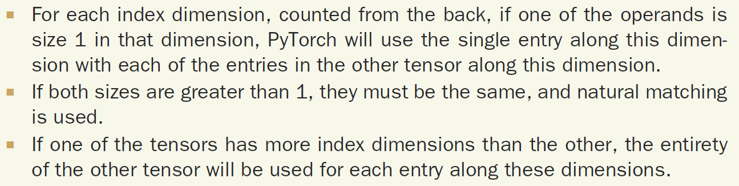

For example,

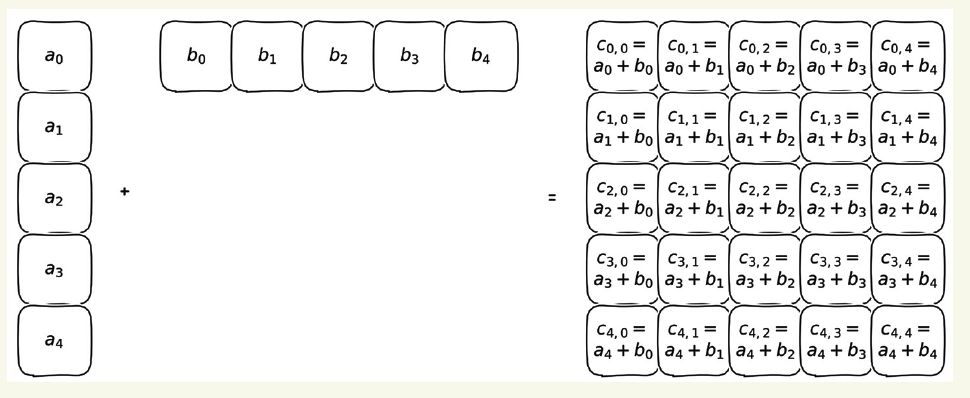

In [ ]:
a = torch.rand(5,1)
print('a-->', a)
print('a.shape -->',a.shape)
print()

b = torch.rand(1,5)
print('b-->',b)
print('b.shape -->',b.shape)
print()

c = a + b
print('c-->',c)
print('c.shape -->',c.shape)

a--> tensor([[0.0279],
        [0.9331],
        [0.9569],
        [0.5276],
        [0.1789]])
a.shape --> torch.Size([5, 1])

b--> tensor([[0.1952, 0.8841, 0.4261, 0.1750, 0.0897]])
b.shape --> torch.Size([1, 5])

c--> tensor([[0.2232, 0.9121, 0.4540, 0.2030, 0.1176],
        [1.1283, 1.8172, 1.3592, 1.1081, 1.0228],
        [1.1521, 1.8410, 1.3829, 1.1319, 1.0465],
        [0.7228, 1.4117, 0.9536, 0.7026, 0.6172],
        [0.3741, 1.0630, 0.6049, 0.3539, 0.2686]])
c.shape --> torch.Size([5, 5])
